## About

This plot is a [ridgeline](https://python-graph-gallery.com/ridgeline/). It is a way to display the distribution of a **numerical variable for several groups**. 

As a teaser, here is the plot we’re gonna try building:

![scatterplot](https://github.com/holtzy/The-Python-Graph-Gallery/blob/master/static/graph/web-ridgeline-by-text.png?raw=true)

## Libraries

For creating this chart, we will need a whole bunch of libraries!

- [matplotlib](https://python-graph-gallery.com/matplotlib/): to customize the appearance of the chart
- [seaborn](https://python-graph-gallery.com/seaborn/): to create the chart
- [pandas](https://python-graph-gallery.com/pandas/): to handle the data

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

## Dataset

The data can be accessed using the **url below**. 

In [2]:
rent_path = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2022/2022-07-05/rent.csv'
rent_path = '../../static/data/rent.csv'
rent = pd.read_csv(rent_path)

rent_words_path = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2022/2022-07-05/rent_title_words.csv'
rent_words_path = '../../static/data/rent_title_words.csv'
rent_words = pd.read_csv(rent_words_path)

df_path = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2022/2022-07-05/rent.csv'
df_path = '../../static/data/df_plot.csv'
df = pd.read_csv(df_path)

## Simple ridgeline plot

Let's start by creating a (relatively) simple [ridgeline plot](https://python-graph-gallery.com/ridgeline/). 

Here are the main steps to create the chart:

- initiate a **15 rows and 1 column** grid
- we create a **list of the `words`**, sorted by the average price
- we **iterate over the list of words** to create a subplot for each word with `kdeplot()`
- specify **x and y axis limits** to ensure each plot has the same scale

And that's it!

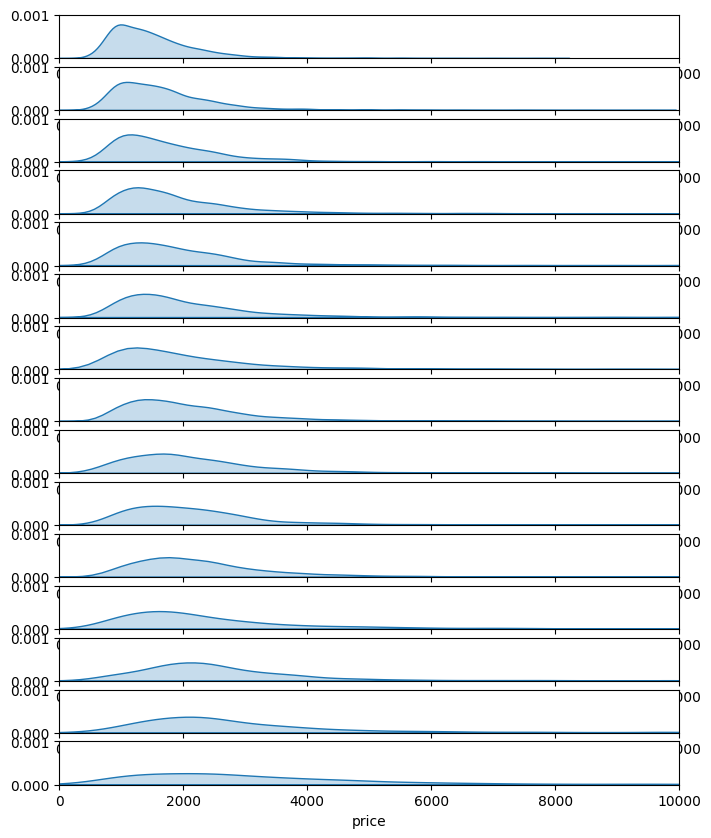

In [3]:
fig, axs = plt.subplots(nrows=15, ncols=1, figsize=(8, 10))
axs = axs.flatten() # needed to access each individual axis

# iterate over axes
words = df.sort_values('mean_price')['word'].unique().tolist()
for i, word in enumerate(words):

    # subset the data for each word
    subset = df[df['word'] == word]

    # plot the distribution of prices
    sns.kdeplot(
        subset['price'],
        shade=True,
        ax=axs[i]
    )

    # set title and labels
    axs[i].set_xlim(0, 10000)
    axs[i].set_ylim(0, 0.001)
    axs[i].set_ylabel('')

plt.show()

## Change color and remove axis

First, we add a `color` and `edgecolor` argument to the `kdeplot()` function to change the **color of the lines** and the **edge** of the area. 

Then, we **remove the axis** using `set_axis_off()`.

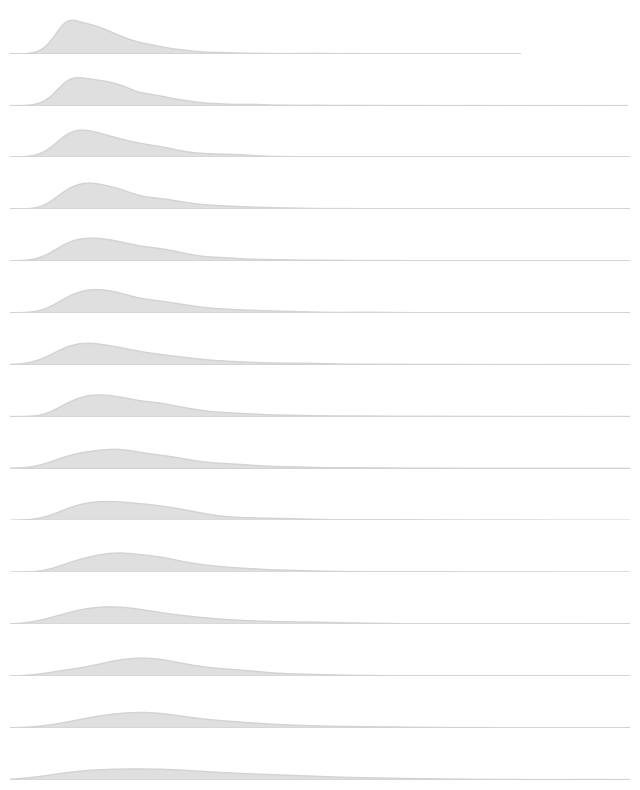

In [4]:
fig, axs = plt.subplots(nrows=15, ncols=1, figsize=(8, 10))
axs = axs.flatten() # needed to access each individual axis

# iterate over axes
words = df.sort_values('mean_price')['word'].unique().tolist()
for i, word in enumerate(words):

    # subset the data for each word
    subset = df[df['word'] == word]

    # plot the distribution of prices
    sns.kdeplot(
        subset['price'],
        shade=True,
        ax=axs[i],
        color='grey',
        edgecolor='lightgrey'
    )

    # set title and labels
    axs[i].set_xlim(0, 10000)
    axs[i].set_ylim(0, 0.001)
    axs[i].set_ylabel('')

    # remove axis
    axs[i].set_axis_off()

plt.show()

## Add median reference line and points

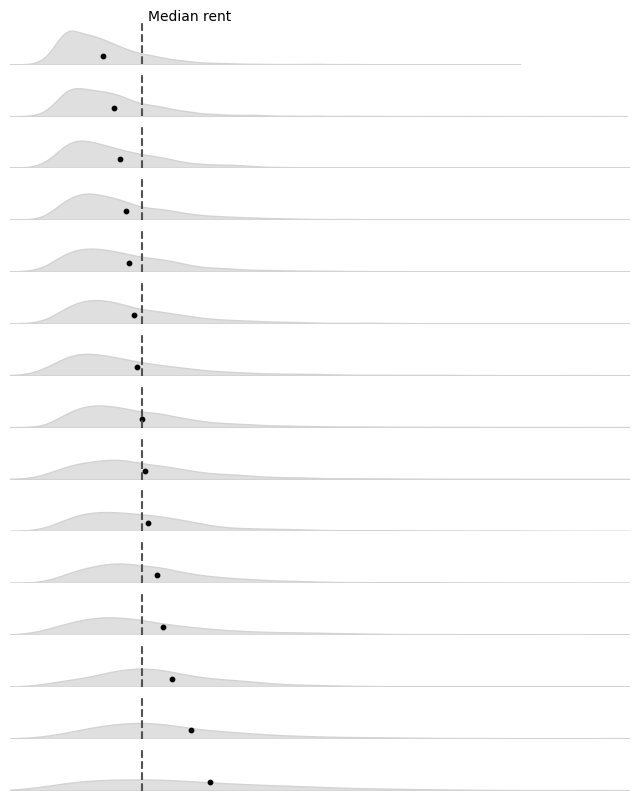

In [5]:
fig, axs = plt.subplots(nrows=15, ncols=1, figsize=(8, 10))
axs = axs.flatten() # needed to access each individual axis

# iterate over axes
words = df.sort_values('mean_price')['word'].unique().tolist()
for i, word in enumerate(words):

    # subset the data for each word
    subset = df[df['word'] == word]

    # plot the distribution of prices
    sns.kdeplot(
        subset['price'],
        shade=True,
        ax=axs[i],
        color='grey',
        edgecolor='lightgrey'
    )

    # mean value as a reference
    mean = subset['price'].mean()
    axs[i].scatter([mean], [0.0002], color='black', s=10)

    # global mean reference line
    global_mean = rent['price'].mean()
    axs[i].axvline(global_mean, color='#525252', linestyle='--')

    # set title and labels
    axs[i].set_xlim(0, 10000)
    axs[i].set_ylim(0, 0.001)
    axs[i].set_ylabel('')

    # remove axis
    axs[i].set_axis_off()

text = 'Median rent'
fig.text(
    0.35, 0.88,
    text,
    ha='center',
    fontsize=10
)

fig.savefig('../../../rent_prices.png', dpi=300)
plt.show()

## Quantile values on top

In order to **add quantile values** on top of the plot, we need to:

- calculate the **quantile values** for each word with `np.percentile()`
- define a **list of colors** that will be used to fill the space between them
- use the `fill_between()` function with coordinates and colors to **fill the space**

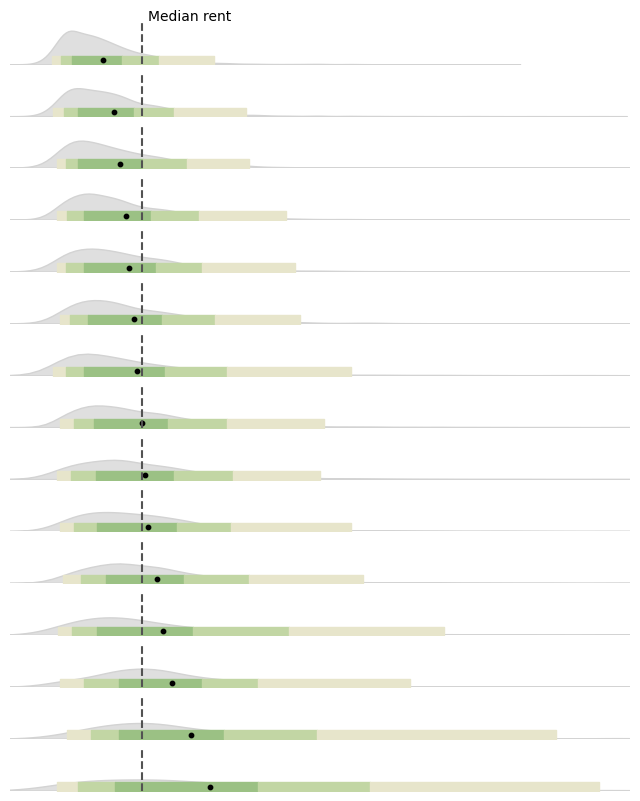

In [6]:
darkgreen = '#9BC184'
midgreen = '#C2D6A4'
lowgreen = '#E7E5CB'
colors = [lowgreen, midgreen, darkgreen, midgreen, lowgreen]

fig, axs = plt.subplots(nrows=15, ncols=1, figsize=(8, 10))
axs = axs.flatten() # needed to access each individual axis

# iterate over axes
words = df.sort_values('mean_price')['word'].unique().tolist()
for i, word in enumerate(words):

    # subset the data for each word
    subset = df[df['word'] == word]

    # plot the distribution of prices
    sns.kdeplot(
        subset['price'],
        shade=True,
        ax=axs[i],
        color='grey',
        edgecolor='lightgrey'
    )

    # global mean reference line
    global_mean = rent['price'].mean()
    axs[i].axvline(global_mean, color='#525252', linestyle='--')

    # compute quantiles
    quantiles = np.percentile(subset['price'], [2.5, 10, 25, 75, 90, 97.5])
    quantiles = quantiles.tolist()

    # fill space between each pair of quantiles
    for j in range(len(quantiles) - 1):
        axs[i].fill_between(
            [quantiles[j], # lower bound
             quantiles[j+1]], # upper bound
            0, # max y=0
            0.0002, # max y=0.0002
            color=colors[j]
        )

    # mean value as a reference
    mean = subset['price'].mean()
    axs[i].scatter([mean], [0.0001], color='black', s=10)

    # set title and labels
    axs[i].set_xlim(0, 10000)
    axs[i].set_ylim(0, 0.001)
    axs[i].set_ylabel('')

    # remove axis
    axs[i].set_axis_off()

text = 'Median rent'
fig.text(
    0.35, 0.88,
    text,
    ha='center',
    fontsize=10
)

fig.savefig('../../../rent_prices.png', dpi=300)
plt.show()

## Annotations

### Fonts

In the original chart, the author used a different font named `Fira Sans`. Here is how we load it with [matplotlib](https://python-graph-gallery.com/matplotlib/):

- download the font from [google font service](https://fonts.google.com/specimen/Fira+Sans)
- install the font on your computer (on mac, double click on the downloaded file and click on "install font", then it will be available in the **font book**)
- get the path of the font (you can use the `fc-list | grep "Fira"` command in your terminal to find it OR see the code below)
- import the `FontProperties` class from `matplotlib.font_manager` and use it to set the font of the annotation

And that's it! For this post we need 2 of them: `FiraSans-Regular.ttf` and `FiraSans-SemiBold.ttf`.

In [24]:
from matplotlib import font_manager

for fontpath in font_manager.findSystemFonts(fontpaths=None, fontext='ttf'):
    if 'firasans' in fontpath.lower():
        print(fontpath)

/Users/josephbarbier/Library/Fonts/FiraSans-Black.ttf
/Users/josephbarbier/Library/Fonts/FiraSans-Regular.ttf
/Users/josephbarbier/Library/Fonts/FiraSans-ExtraLightItalic.ttf
/Users/josephbarbier/Library/Fonts/FiraSans-SemiBoldItalic.ttf
/Users/josephbarbier/Library/Fonts/FiraSans-ExtraBold.ttf
/Users/josephbarbier/Library/Fonts/FiraSans-ThinItalic.ttf
/Users/josephbarbier/Library/Fonts/FiraSans-Medium.ttf
/Users/josephbarbier/Library/Fonts/FiraSans-MediumItalic.ttf
/Users/josephbarbier/Library/Fonts/FiraSans-BoldItalic.ttf
/Users/josephbarbier/Library/Fonts/FiraSans-Bold.ttf
/Users/josephbarbier/Library/Fonts/FiraSans-ExtraLight.ttf
/Users/josephbarbier/Library/Fonts/FiraSans-SemiBold.ttf
/Users/josephbarbier/Library/Fonts/FiraSans-LightItalic.ttf
/Users/josephbarbier/Library/Fonts/FiraSans-Light.ttf
/Users/josephbarbier/Library/Fonts/FiraSans-Thin.ttf
/Users/josephbarbier/Library/Fonts/FiraSans-Italic.ttf
/Users/josephbarbier/Library/Fonts/FiraSans-ExtraBoldItalic.ttf
/Users/josephba

In [25]:
from matplotlib.font_manager import FontProperties

personal_path = '/Users/josephbarbier/Library/Fonts/'

font_path = personal_path + 'FiraSans-Regular.ttf'
fira_sans_regular = FontProperties(fname=font_path)

font_path = personal_path + 'FiraSans-SemiBold.ttf'
fira_sans_semibold = FontProperties(fname=font_path)

### Add annotations

Now that we have our font, we can **add the annotations**.

This mainly relies on the `text()` function from matplotlib. We just need to specify the **x and y coordinates** of the text, the **text itself**, and the **font properties**.

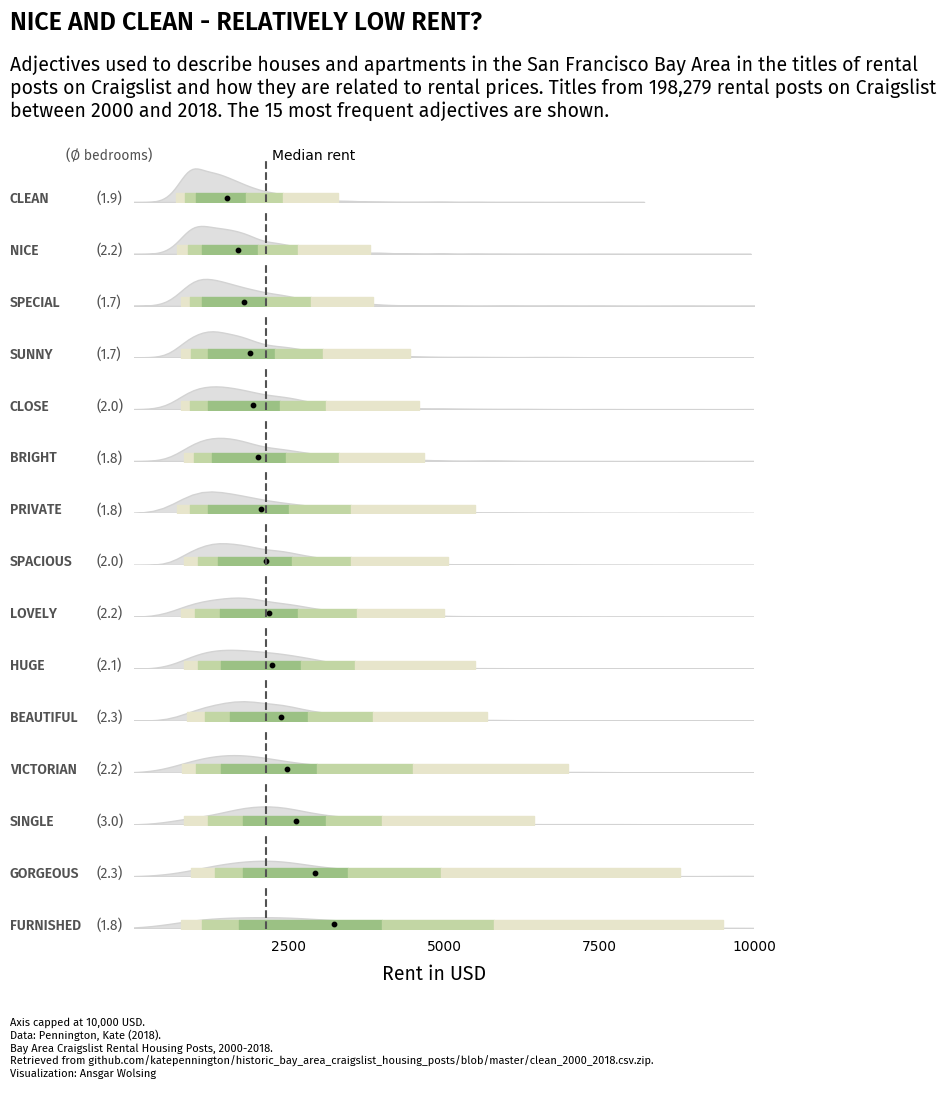

In [79]:
darkgreen = '#9BC184'
midgreen = '#C2D6A4'
lowgreen = '#E7E5CB'
colors = [lowgreen, midgreen, darkgreen, midgreen, lowgreen]

darkgrey = '#525252'

fig, axs = plt.subplots(nrows=15, ncols=1, figsize=(8, 10))
axs = axs.flatten() # needed to access each individual axis

# iterate over axes
words = df.sort_values('mean_price')['word'].unique().tolist()
for i, word in enumerate(words):

    # subset the data for each word
    subset = df[df['word'] == word]

    # plot the distribution of prices
    sns.kdeplot(
        subset['price'],
        shade=True,
        ax=axs[i],
        color='grey',
        edgecolor='lightgrey'
    )

    # global mean reference line
    global_mean = rent['price'].mean()
    axs[i].axvline(global_mean, color=darkgrey, linestyle='--')

    # display average number of bedrooms on left
    rent_with_bed = rent_words[rent_words['beds'] > 0]
    rent_with_bed_filter = rent_with_bed[rent_with_bed['word'] == word]
    avg_bedrooms = rent_with_bed_filter['beds'].mean().round(1)
    axs[i].text(
        -600, 0,
        f'({avg_bedrooms})',
        ha='left',
        fontsize=10,
        fontproperties=fira_sans_regular,
        color=darkgrey
    )

    # display word on left
    axs[i].text(
        -2000, 0,
        word.upper(),
        ha='left',
        fontsize=10,
        fontproperties=fira_sans_semibold,
        color=darkgrey
    )

    # compute quantiles
    quantiles = np.percentile(subset['price'], [2.5, 10, 25, 75, 90, 97.5])
    quantiles = quantiles.tolist()

    # fill space between each pair of quantiles
    for j in range(len(quantiles) - 1):
        axs[i].fill_between(
            [quantiles[j], # lower bound
             quantiles[j+1]], # upper bound
            0, # max y=0
            0.0002, # max y=0.0002
            color=colors[j]
        )

    # mean value as a reference
    mean = subset['price'].mean()
    axs[i].scatter([mean], [0.0001], color='black', s=10)

    # set title and labels
    axs[i].set_xlim(0, 10000)
    axs[i].set_ylim(0, 0.001)
    axs[i].set_ylabel('')

    # x axis scale for last ax
    if i == 14:
        values = [2500, 5000, 7500, 10000]
        for value in values:
            axs[i].text(
                value, -0.0005,
                f'{value}',
                ha='center',
                fontsize=10
            )

    # remove axis
    axs[i].set_axis_off()

# reference line label
text = 'Median rent'
fig.text(
    0.35, 0.88,
    text,
    ha='center',
    fontsize=10
)

# number of bedrooms label
text = '(Ø bedrooms)'
fig.text(
    0.04, 0.88,
    text,
    ha='left',
    fontsize=10,
    fontproperties=fira_sans_regular,
    color=darkgrey
)

# credit
text = """
Axis capped at 10,000 USD.
Data: Pennington, Kate (2018). 
Bay Area Craigslist Rental Housing Posts, 2000-2018.
Retrieved from github.com/katepennington/historic_bay_area_craigslist_housing_posts/blob/master/clean_2000_2018.csv.zip.
Visualization: Ansgar Wolsing
"""
fig.text(
    -0.03, -0.05,
    text,
    ha='left',
    fontsize=8,
    fontproperties=fira_sans_regular
)

# x axis label
text = "Rent in USD"
fig.text(
    0.5, 0.06,
    text,
    ha='center',
    fontsize=14,
    fontproperties=fira_sans_regular
)

# description
text = """
Adjectives used to describe houses and apartments in the San Francisco Bay Area in the titles of rental
posts on Craigslist and how they are related to rental prices. Titles from 198,279 rental posts on Craigslist
between 2000 and 2018. The 15 most frequent adjectives are shown.
"""
fig.text(
    -0.03, 0.9,
    text,
    ha='left',
    fontsize=14,
    fontproperties=fira_sans_regular
)

# title
text = "NICE AND CLEAN - RELATIVELY LOW RENT?"
fig.text(
    -0.03, 1.01,
    text,
    ha='left',
    fontsize=18,
    fontproperties=fira_sans_semibold
)

plt.savefig('../../../rent_prices.png', dpi=300, bbox_inches='tight')
plt.show()

## Legend

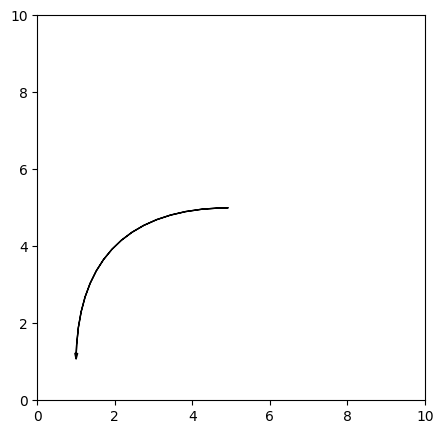

In [180]:
import matplotlib.patches as patches
def add_arrow(head_pos, tail_pos, ax):
    style = "Simple, tail_width=0.01, head_width=2, head_length=4"
    kw = dict(arrowstyle=style, color="k")
    arrow = patches.FancyArrowPatch(
        tail_pos, head_pos,
        connectionstyle="arc3,rad=.5",
        **kw
    )
    ax.add_patch(arrow)


# test
fig, ax = plt.subplots(figsize=(5, 5))
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
add_arrow((1, 1), (5, 5), ax)
plt.show()

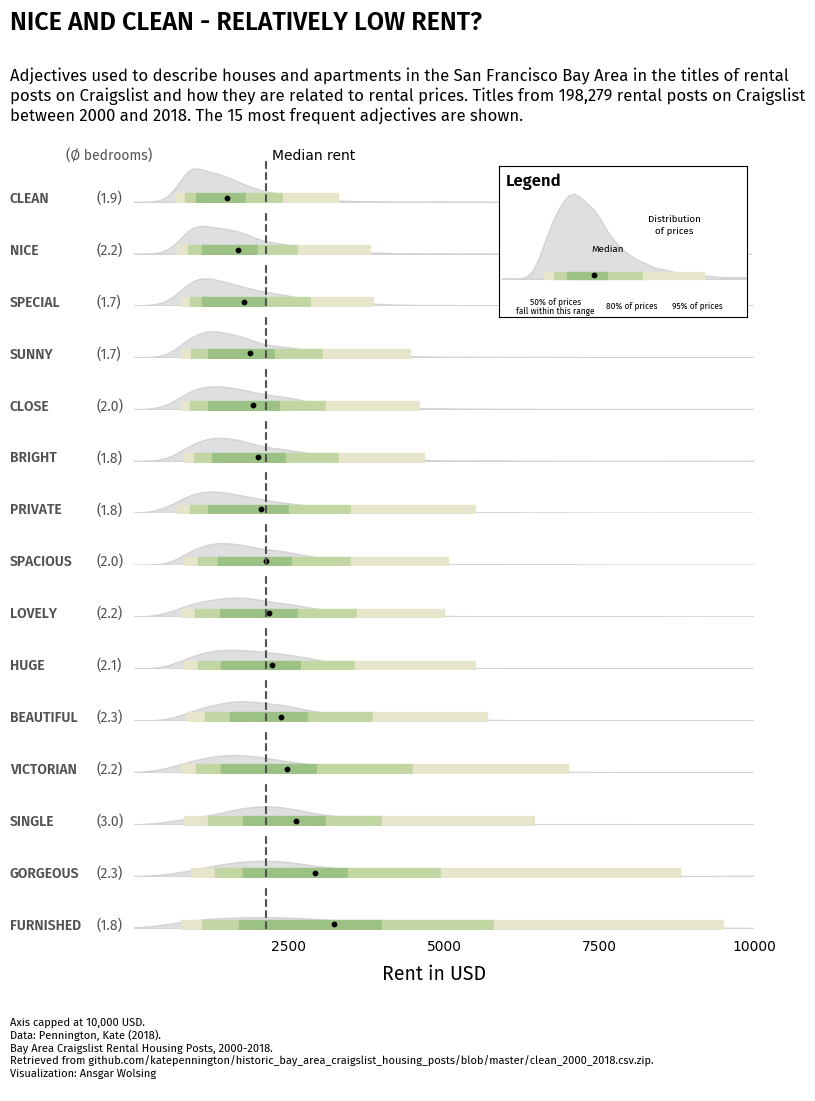

In [169]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes


darkgreen = '#9BC184'
midgreen = '#C2D6A4'
lowgreen = '#E7E5CB'
colors = [lowgreen, midgreen, darkgreen, midgreen, lowgreen]

darkgrey = '#525252'

fig, axs = plt.subplots(nrows=15, ncols=1, figsize=(8, 10))
axs = axs.flatten() # needed to access each individual axis

# iterate over axes
words = df.sort_values('mean_price')['word'].unique().tolist()
for i, word in enumerate(words):

    # subset the data for each word
    subset = df[df['word'] == word]

    # plot the distribution of prices
    sns.kdeplot(
        subset['price'],
        shade=True,
        ax=axs[i],
        color='grey',
        edgecolor='lightgrey'
    )

    # global mean reference line
    global_mean = rent['price'].mean()
    axs[i].axvline(global_mean, color=darkgrey, linestyle='--')

    # display average number of bedrooms on left
    rent_with_bed = rent_words[rent_words['beds'] > 0]
    rent_with_bed_filter = rent_with_bed[rent_with_bed['word'] == word]
    avg_bedrooms = rent_with_bed_filter['beds'].mean().round(1)
    axs[i].text(
        -600, 0,
        f'({avg_bedrooms})',
        ha='left',
        fontsize=10,
        fontproperties=fira_sans_regular,
        color=darkgrey
    )

    # display word on left
    axs[i].text(
        -2000, 0,
        word.upper(),
        ha='left',
        fontsize=10,
        fontproperties=fira_sans_semibold,
        color=darkgrey
    )

    # compute quantiles
    quantiles = np.percentile(subset['price'], [2.5, 10, 25, 75, 90, 97.5])
    quantiles = quantiles.tolist()

    # fill space between each pair of quantiles
    for j in range(len(quantiles) - 1):
        axs[i].fill_between(
            [quantiles[j], # lower bound
             quantiles[j+1]], # upper bound
            0, # max y=0
            0.0002, # max y=0.0002
            color=colors[j]
        )

    # mean value as a reference
    mean = subset['price'].mean()
    axs[i].scatter([mean], [0.0001], color='black', s=10)

    # set title and labels
    axs[i].set_xlim(0, 10000)
    axs[i].set_ylim(0, 0.001)
    axs[i].set_ylabel('')

    # x axis scale for last ax
    if i == 14:
        values = [2500, 5000, 7500, 10000]
        for value in values:
            axs[i].text(
                value, -0.0005,
                f'{value}',
                ha='center',
                fontsize=10
            )

    # remove axis
    axs[i].set_axis_off()

text = 'Median rent'
fig.text(
    0.35, 0.88,
    text,
    ha='center',
    fontsize=10
)

# credit
text = """
Axis capped at 10,000 USD.
Data: Pennington, Kate (2018). 
Bay Area Craigslist Rental Housing Posts, 2000-2018.
Retrieved from github.com/katepennington/historic_bay_area_craigslist_housing_posts/blob/master/clean_2000_2018.csv.zip.
Visualization: Ansgar Wolsing
"""
fig.text(
    -0.03, -0.05,
    text,
    ha='left',
    fontsize=8,
    fontproperties=fira_sans_regular
)

# x axis label
text = "Rent in USD"
fig.text(
    0.5, 0.06,
    text,
    ha='center',
    fontsize=14,
    fontproperties=fira_sans_regular
)

# description
text = """
Adjectives used to describe houses and apartments in the San Francisco Bay Area in the titles of rental
posts on Craigslist and how they are related to rental prices. Titles from 198,279 rental posts on Craigslist
between 2000 and 2018. The 15 most frequent adjectives are shown.
"""
fig.text(
    -0.03, 0.9,
    text,
    ha='left',
    fontsize=12,
    fontproperties=fira_sans_regular
)

# title
text = "NICE AND CLEAN - RELATIVELY LOW RENT?"
fig.text(
    -0.03, 1.01,
    text,
    ha='left',
    fontsize=18,
    fontproperties=fira_sans_semibold
)

# number of bedrooms label
text = '(Ø bedrooms)'
fig.text(
    0.04, 0.88,
    text,
    ha='left',
    fontsize=10,
    fontproperties=fira_sans_regular,
    color=darkgrey
)

# legend on the first ax
subax = inset_axes(
    parent_axes=axs[0],
    width="40%",
    height="350%",
    loc=1
)
subax.set_xticks([])
subax.set_yticks([])
beautiful_subset = df[df['word'] == 'beautiful']
sns.kdeplot(
    beautiful_subset['price'],
    shade=True,
    ax=subax,
    color='grey',
    edgecolor='lightgrey'
)
quantiles = np.percentile(beautiful_subset['price'], [2.5, 10, 25, 75, 90, 97.5])
quantiles = quantiles.tolist()
for j in range(len(quantiles) - 1):
    subax.fill_between(
        [quantiles[j], # lower bound
         quantiles[j+1]], # upper bound
        0, # max y=0
        0.00004, # max y=0.00004
        color=colors[j]
    )
subax.set_xlim(-500, 7000)
subax.set_ylim(-0.0002, 0.0006)
mean = beautiful_subset['price'].mean()
subax.scatter([mean], [0.00002], color='black', s=10)
subax.text(
    -300, 0.0005,
    'Legend',
    ha='left',
    fontsize=12,
    fontproperties=fira_sans_semibold
)
subax.text(
    4800, 0.00025,
    'Distribution\nof prices',
    ha='center',
    fontsize=7,
    fontproperties=fira_sans_regular
)
subax.text(
    mean+400, 0.00015,
    'Median',
    ha='center',
    fontsize=7,
    fontproperties=fira_sans_regular
)
subax.text(
    5500, -0.00015,
    "95% of prices",
    ha='center',
    fontsize=6,
    fontproperties=fira_sans_regular
)
subax.text(
    3500, -0.00015,
    "80% of prices",
    ha='center',
    fontsize=6,
    fontproperties=fira_sans_regular
)
subax.text(
    1200, -0.00018,
    "50% of prices\nfall within this range",
    ha='center',
    fontsize=6,
    fontproperties=fira_sans_regular
)


plt.savefig('../../../rent_prices.png', dpi=300, bbox_inches='tight')
plt.show()

## Going further

This article explains how to reproduce a [line chart](https://python-graph-gallery.com/line-chart/) with small multiples, originally design by Gilbert Fontana. 

For more examples of **advanced customization**, check out this [other reproduction of Fontana](https://python-graph-gallery.com/web-stacked-line-chart-with-labels/)'s work. Also, you might be interested in [adding an image/logo](https://python-graph-gallery.com/513-add-logo-matplotlib/) to your chart. 